<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/3.3%20Unconstrained%20Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 3.3 Unconstrained Optimization

Key Concepts

- Local and Global Minimizers
- Convexity
- Gradient Descent

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

## Minimizers

### Global Minimizer

$f(x*) \le f(x), \forall x \in R^d$

Finding the global minimizer involves comparing $f(x*)$ with ever f(x) value in the input space.
This can be a complicated process for a large input space.
Consequently, only in limited and special cases can a $f(x*)$ be proven as the global minimizer.

### Local Minimizer

$f(x*) \le f(x), \forall x \in B_{\delta}(x*) \backslash \{x*\}$

A local minimizer finds $f(x*)$ such that it is the global minimizer in a neighborhood $N$ surrounding $x*$.

### Descent Direction

$f(x_0 + \alpha v) < f(x_0), \forall \alpha \in (0, \alpha*)$

The directional derivative gives a criterion for descent directions for a continuously differentiable function.

$\frac{\delta f(x_0)}{\delta v} = \nabla f(x_0)^T v < 0$


In [2]:
# Generate Data
X = np.arange(0, 1, 0.0001)
f_x = np.sin(2*np.pi*X) * np.sin(4*np.pi*X) - np.sin(8*np.pi*X)

In [3]:
# Find global minima
min_x = X[np.argmin(f_x)]
min_y = np.min(f_x)

# Find the local minima
local_min_x = X[argrelextrema(f_x, np.less)[0]]
local_min_y = f_x[argrelextrema(f_x, np.less)[0]]

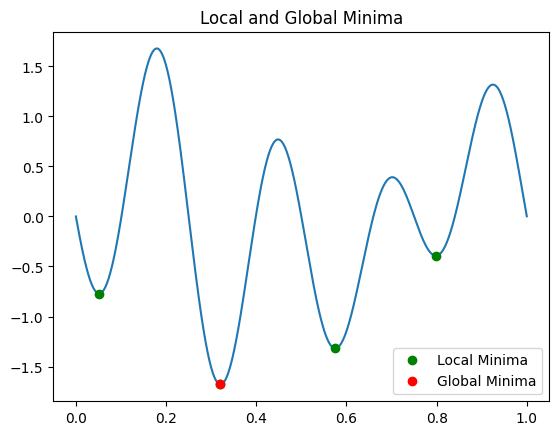

In [4]:
plt.figure()
plt.title("Local and Global Minima")

# Plot the function
plt.plot(X, f_x)

# Plot the local minima
plt.plot(local_min_x, local_min_y, 'go', label="Local Minima")

# Plot the global minima
plt.plot(min_x, min_y, 'ro', label="Global Minima")

plt.legend()
plt.show()

## Convexity

A function is convex iff a line segment between 2 points lies above the graph between the points.

$f((1-\alpha)x + \alpha y) \le (1-alpha)f(x) + \alpha f(y),  for$
$x, y \in R, and$
$\alpha \in [0, 1]$

The convexity of a function can be proven with its Hessian.

$H_f(x) = \frac{1}{2}[P + P^T]$

So, f is convex iff $\frac{1}{2}[P + P^T]$ has non-negative eigenvalues.

### First-order Convexity

$f(y) \ge f(x) + \nabla f(x)^T(x-w)$

### Second-order Convexity

f is convex iff $H_f(x)$ is PSD for $x \in R^d$

### Global Minimizers of Convex Functions

For a convex function, minimizers must follow: $\nabla f(x_0) = 0$.
Which means that is $\nabla f(x_0) = 0$, then $x_0$ is a global minimizer.

#### Global Minimizer

$x^* = -Q \Lambda^{-1} Q^T q$


## Gradient Descent

Iterative optimization algorithm to find the local minimum of a differentiable function.

The naive approach involves solving for an unconstrained optimization problem of the form: $min f(x)$ where $x \in R^d$

The less naive approach would be to find all points $x$ of $f$ such that $\nabla f(x) = 0$ and choosing the $x$ that produces the smallest $f(x)$.


### Least Squares

$min ||A x - b||^2$, where $x \in R^{n \times d}$

Any local minimizer is also the global minimizer.

#### Steepest Descent

$- \nabla f$ provides the direction.

$ \frac{\partial f(x_0)}{\partial v} \ge \frac{\partial f(x_0)}{\partial v^*}$

where $v^* = \frac{\nabla f(x_0)}{|| \nabla f(x_0) ||}$
